# 01 — EDA: MET On-View Dataset

This notebook explores a sample from The MET API.

**Steps**
1. Build or load `data/train.jsonl`
2. Inspect target balance, missingness, key categorical/text fields
3. Quick text stats and word clouds (optional)


In [1]:
# If you haven't built the dataset yet, run the CLI (or the module) from the project root in a terminal:
# !python -m src.data.build_dataset --limit 1000
import sys
print(sys.executable)

C:\Users\georg\.virtualenvs\met-display-predictor\Scripts\python.exe


In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path


path = '../data/MetObjects.txt'  # or .csv
usecols = [
    # Target-style columns
    "Is Highlight",
    "Is Public Domain",
    "Is Timeline Work",
    # Identifiers
    "Object ID",
    # Core categorical / textual metadata
    "Department",
    "Object Name",
    "Title",
    "Culture",
    "Period",
    "Dynasty",
    "Reign",
    "Medium",
    "Classification",
    "Credit Line",
    # Chronological
    "Object Date",
    "Object Begin Date",
    "Object End Date",
    # Maybe useful numeric feature
    "AccessionYear",
    # Provenance-ish
    "Country",
    "Region",
    "Subregion",
    # Optional drop-in for artist-level fields later
    # "Artist Display Name", "Artist Nationality",
]


# Read only existing columns (handles dataset variants gracefully)
df_all = pd.read_csv(path, low_memory=False)
cols = [c for c in usecols if c in df_all.columns]
df = df_all[cols].copy()

In [3]:
df.iloc[0]          # first row (Series)


Is Highlight                                      False
Is Public Domain                                  False
Is Timeline Work                                  False
Object ID                                             1
Department                            The American Wing
Object Name                                        Coin
Title                      One-dollar Liberty Head Coin
Culture                                             NaN
Period                                              NaN
Dynasty                                             NaN
Reign                                               NaN
Medium                                             Gold
Classification                                      NaN
Credit Line          Gift of Heinz L. Stoppelmann, 1979
Object Date                                        1853
Object Begin Date                                  1853
Object End Date                                    1853
AccessionYear                                   

In [4]:
# 1) Rename to unified field names used by the API / our pipeline
rename_map = {
    "Is Highlight": "label_isHighlight",
    "Is Public Domain": "isPublicDomain",
    "Is Timeline Work": "isTimelineWork",
    "Object ID": "objectID",
    "Department": "department",
    "Object Name": "objectName",
    "Title": "title",
    "Culture": "culture",
    "Period": "period",
    "Dynasty": "dynasty",
    "Reign": "reign",
    "Medium": "medium",
    "Classification": "classification",
    "Credit Line": "creditLine",
    "Object Date": "objectDate",
    "Object Begin Date": "objectBeginDate",
    "Object End Date": "objectEndDate",
    "AccessionYear": "accessionYear",
    "Country": "country",
    "Region": "region",
    "Subregion": "subregion",
}

df = df.rename(columns=rename_map)
df.iloc[0] 

label_isHighlight                                 False
isPublicDomain                                    False
isTimelineWork                                    False
objectID                                              1
department                            The American Wing
objectName                                         Coin
title                      One-dollar Liberty Head Coin
culture                                             NaN
period                                              NaN
dynasty                                             NaN
reign                                               NaN
medium                                             Gold
classification                                      NaN
creditLine           Gift of Heinz L. Stoppelmann, 1979
objectDate                                         1853
objectBeginDate                                    1853
objectEndDate                                      1853
accessionYear                                   

In [5]:
#3) Load on-view objects (from your fetcher)
onview_path = "../data/onview_objects.jsonl"   # <-- adjust if different
df_onView = pd.read_json(onview_path, lines=True)
df_onView.head()


,objectID,isHighlight,accessionNumber,accessionYear,isPublicDomain,primaryImage,primaryImageSmall,additionalImages,constituents,department,...,classification,rightsAndReproduction,linkResource,metadataDate,repository,objectURL,tags,objectWikidata_URL,isTimelineWork,GalleryNumber
0,24991,False,"81.1.599a, b",1881,True,https://images.metmuseum.org/CRDImages/aa/orig...,https://images.metmuseum.org/CRDImages/aa/web-...,[https://images.metmuseum.org/CRDImages/aa/ori...,None,Arms and Armor,...,Daggers,,,2025-03-06T04:54:30Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,None,https://www.wikidata.org/wiki/Q78813071,True,379
1,459006,False,1975.1.65a–f,1975,True,https://images.metmuseum.org/CRDImages/rl/orig...,https://images.metmuseum.org/CRDImages/rl/web-...,[https://images.metmuseum.org/CRDImages/rl/ori...,"[{'constituentID': 164535, 'role': 'Artist', '...",Robert Lehman Collection,...,Paintings,,,2020-09-16T18:35:19.457Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"[{'term': 'Angels', 'AAT_URL': 'http://vocab.g...",https://www.wikidata.org/wiki/Q20185404,False,952
2,460813,False,1975.1.1580,1975,True,https://images.metmuseum.org/CRDImages/rl/orig...,https://images.metmuseum.org/CRDImages/rl/web-...,[],None,Robert Lehman Collection,...,Glass,,,2020-09-16T18:35:19.457Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"[{'term': 'Infants', 'AAT_URL': 'http://vocab....",https://www.wikidata.org/wiki/Q20188136,False,951
3,461279,False,1975.1.1555,1975,True,https://images.metmuseum.org/CRDImages/rl/orig...,https://images.metmuseum.org/CRDImages/rl/web-...,[],None,Robert Lehman Collection,...,Glass,,,2020-09-16T18:35:19.457Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"[{'term': 'Women', 'AAT_URL': 'http://vocab.ge...",https://www.wikidata.org/wiki/Q20188270,False,951
4,461472,False,1975.1.1557,1975,True,https://images.metmuseum.org/CRDImages/rl/orig...,https://images.metmuseum.org/CRDImages/rl/web-...,[],None,Robert Lehman Collection,...,Glass,,,2020-09-16T18:35:19.457Z,"Metropolitan Museum of Art, New York, NY",https://www.metmuseum.org/art/collection/searc...,"[{'term': 'Christ', 'AAT_URL': 'http://vocab.g...",https://www.wikidata.org/wiki/Q20188280,False,951


In [6]:
# Keep only the columns we care about (and that exist)
keep_cols = set(rename_map.values()) | {"objectID", "isPublicDomain", "department", "title", "medium", "classification"}
keep_cols = [c for c in keep_cols if c in df_onView.columns]
df_onView = df_onView[keep_cols].copy()

# Ensure objectID int, unique
df_onView = df_onView.dropna(subset=["objectID"])
df_onView["objectID"] = df_onView["objectID"].astype(int)
df_onView = df_onView.drop_duplicates(subset=["objectID"])

# Label for positives
df_onView["label_isOnView"] = True

In [7]:
# 2) Types & cleaning
def clean_up(df):
    TEXT_FIELDS = ["title","culture","period","dynasty","reign","medium",
                   "classification","department","creditLine","objectName",
                   "country","region","subregion"]
    NUMERIC_FIELDS = ["objectBeginDate","objectEndDate","accessionYear"]
    
    df = df.dropna(subset=["objectID"]).copy()
    df["objectID"] = df["objectID"].astype(int)
    
    for c in TEXT_FIELDS:
        if c in df.columns:
            df[c] = df[c].fillna("").astype(str)
    
    for c in NUMERIC_FIELDS:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    return df


df = clean_up(df)
df_onView = clean_up(df_onView)

print(df[["objectBeginDate","objectEndDate","accessionYear"]].dtypes)


objectBeginDate      int64
objectEndDate        int64
accessionYear      float64
dtype: object


In [8]:
# 4) See where schemas differ
print("CSV columns:", sorted(df.columns.tolist())[:15], "...")
print("API columns:", sorted(df_onView.columns.tolist())[:15], "...")
print("Common:", sorted(set(df.columns) & set(df_onView.columns)))
print("Only-in-CSV:", sorted(set(df.columns) - set(df_onView.columns))[:10])
print("Only-in-API:", sorted(set(df_onView.columns) - set(df.columns))[:10])


CSV columns: ['accessionYear', 'classification', 'country', 'creditLine', 'culture', 'department', 'dynasty', 'isPublicDomain', 'isTimelineWork', 'label_isHighlight', 'medium', 'objectBeginDate', 'objectDate', 'objectEndDate', 'objectID'] ...
API columns: ['accessionYear', 'classification', 'country', 'creditLine', 'culture', 'department', 'dynasty', 'isPublicDomain', 'isTimelineWork', 'label_isOnView', 'medium', 'objectBeginDate', 'objectDate', 'objectEndDate', 'objectID'] ...
Common: ['accessionYear', 'classification', 'country', 'creditLine', 'culture', 'department', 'dynasty', 'isPublicDomain', 'isTimelineWork', 'medium', 'objectBeginDate', 'objectDate', 'objectEndDate', 'objectID', 'objectName', 'period', 'region', 'reign', 'subregion', 'title']
Only-in-CSV: ['label_isHighlight']
Only-in-API: ['label_isOnView']


In [9]:
# Drop the 'label_isHighlight' column (not useful for prediction)
df = df.drop(columns=["label_isHighlight"], errors="ignore")

# Check length before removal
before = len(df)

# Remove any rows whose objectID is already in the on-view dataset
on_ids = set(df_onView["objectID"])
df = df[~df["objectID"].isin(on_ids)].copy()

# Check length after removal
after = len(df)
removed = before - after

print(f"Rows before: {before}")
print(f"Rows after:  {after}")
print(f"Rows removed: {removed}")


Rows before: 484956
Rows after:  432923
Rows removed: 52033


In [10]:
# 1) Label the remaining (off-view) objects as False
df["label_isOnView"] = False

# 2) Concatenate with the on-view dataframe
df_train = pd.concat([df_onView, df], ignore_index=True)

# 3) Quick sanity check
print(df_train["label_isOnView"].value_counts())
print("Total rows:", len(df_train))


label_isOnView
False    432923
True      52462
Name: count, dtype: int64
Total rows: 485385


In [11]:
df_train.iloc[0]

accessionYear                                        1881.0
objectID                                              24991
country                                            Caucasus
region                                                     
subregion                                                  
medium                          Steel, wood, silver, niello
title                          Dagger (Kindjal) with Sheath
objectName                     Dagger (Kindjal) with sheath
objectEndDate                                          1875
reign                                                      
objectBeginDate                                        1815
department                                   Arms and Armor
isPublicDomain                                         True
dynasty                                                    
classification                                      Daggers
creditLine         Bequest of Stephen Whitney Phoenix, 1881
culture               Caucasian, possibl

In [12]:
df_train.describe(include="all").T.head(15)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accessionYear,481462.0,NaN,NaN,NaN,1955.865701,35.632509,1870.0,1927.0,1958.0,1982.0,2056.0
objectID,485385.0,NaN,NaN,NaN,394918.244029,243069.315119,1.0,212498.0,374975.0,571283.0,933537.0
country,485385,1002,,409165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,485385,812,,448384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subregion,485385,364,,463393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium,485385,66007,Terracotta,23548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,485385,246989,,27901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objectName,485385,28682,Print,102988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objectEndDate,485385.0,NaN,NaN,NaN,1403.10447,1131.790071,-240000.0,1593.0,1840.0,1905.0,2870.0
reign,485385,403,,474128,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_train.isna().mean().sort_values(ascending=False).head(10) 

objectDate       0.027211
accessionYear    0.008082
objectID         0.000000
region           0.000000
country          0.000000
subregion        0.000000
medium           0.000000
objectName       0.000000
title            0.000000
reign            0.000000
dtype: float64

In [14]:
text_cols = ["reign","dynasty","subregion","region","country","period","culture","classification","title"]

for c in text_cols:
    emptiness = (df_train[c] == "").mean()
    print(f"{c:<15}: {emptiness:.3f}")


reign          : 0.977
dynasty        : 0.952
subregion      : 0.955
region         : 0.924
country        : 0.843
period         : 0.812
culture        : 0.578
classification : 0.163
title          : 0.057


In [15]:
df_train.head()

,accessionYear,objectID,country,region,subregion,medium,title,objectName,objectEndDate,reign,...,department,isPublicDomain,dynasty,classification,creditLine,culture,isTimelineWork,objectDate,period,label_isOnView
0,1881.0,24991,Caucasus,,,"Steel, wood, silver, niello",Dagger (Kindjal) with Sheath,Dagger (Kindjal) with sheath,1875,,...,Arms and Armor,True,,Daggers,"Bequest of Stephen Whitney Phoenix, 1881","Caucasian, possibly northern Dagestan",True,ca. 1840–50,,True
1,1975.0,459006,,,,"Tempera on wood, gold ground",Six Angels,Painting,1370,,...,Robert Lehman Collection,True,,Paintings,"Robert Lehman Collection, 1975",,False,ca. 1365,,True
2,1975.0,460813,,,,"Figures of lampworked glass (opaque white, pal...",The Finding of Moses,Figurine,1900,,...,Robert Lehman Collection,True,,Glass,"Robert Lehman Collection, 1975",probably French (Nevers),False,"18th century, reassembled last half 19th century",,True
3,1975.0,461279,,,,"Colorless nonlead glass. Cut, polished, revers...",A Female Saint (possibly Rosalia),Panel,1800,,...,Robert Lehman Collection,True,,Glass,"Robert Lehman Collection, 1975",probably Bohemia or Lower Austria,False,second half 18th century,,True
4,1975.0,461472,,,,"Rock crystal. Cut, polished, reverse painted, ...",The Deposition,Plaque,1600,,...,Robert Lehman Collection,True,,Glass,"Robert Lehman Collection, 1975",Italian,False,late 16th century,,True


In [16]:
df_train.nunique().sort_values(ascending=False).head(10)

objectID           485385
title              246989
medium              66007
creditLine          35922
objectDate          33457
objectName          28682
culture              7166
objectBeginDate      2093
objectEndDate        2055
period               1915
dtype: int64

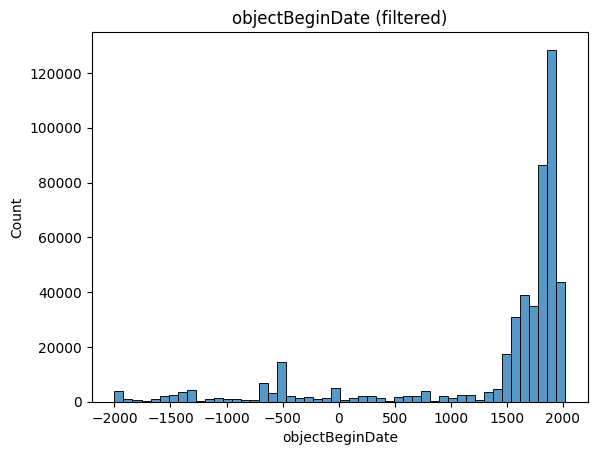

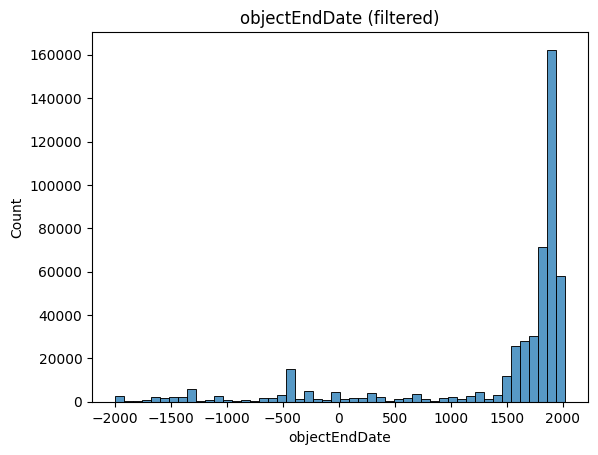

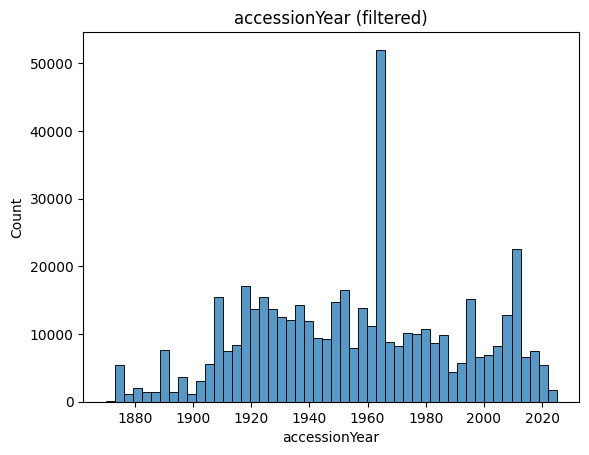

In [17]:
numeric_cols = ["objectBeginDate", "objectEndDate", "accessionYear"]

for col in numeric_cols:
    sns.histplot(
        data=df_train[df_train[col].between(-2000, 2025)],
        x=col,
        bins=50,
        kde=False
    )
    plt.title(f"{col} (filtered)")
    plt.show()


label_isOnView
False    0.891917
True     0.108083
Name: proportion, dtype: float64


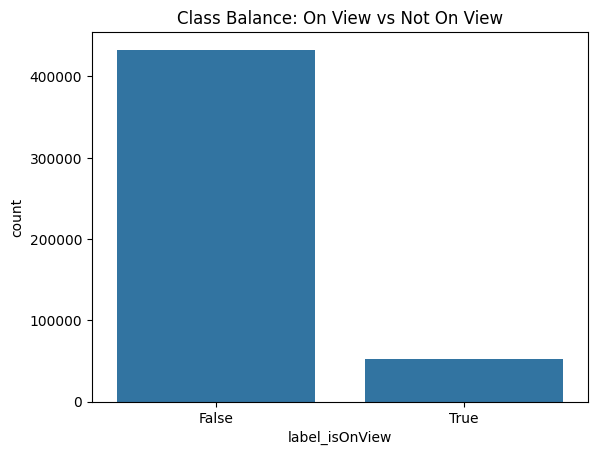

In [18]:
print(df_train["label_isOnView"].value_counts(normalize=True))
sns.countplot(x="label_isOnView", data=df_train)
plt.title("Class Balance: On View vs Not On View")
plt.show()


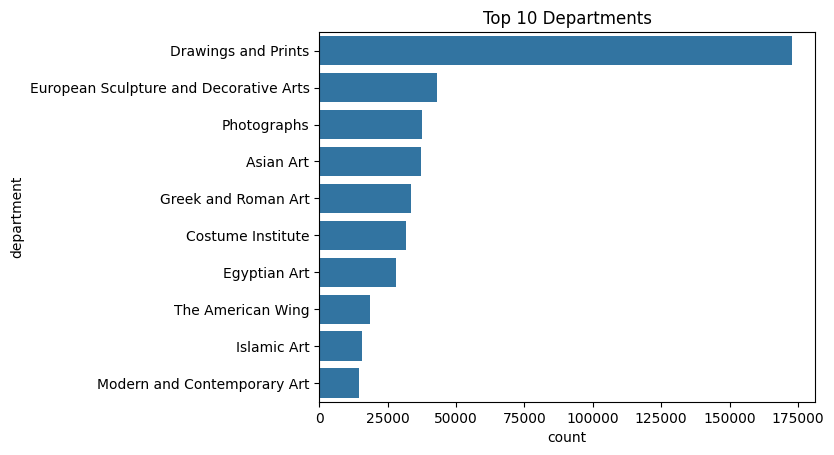

In [19]:
sns.countplot(y="department", data=df_train, order=df_train["department"].value_counts().head(10).index)
plt.title("Top 10 Departments")
plt.show()


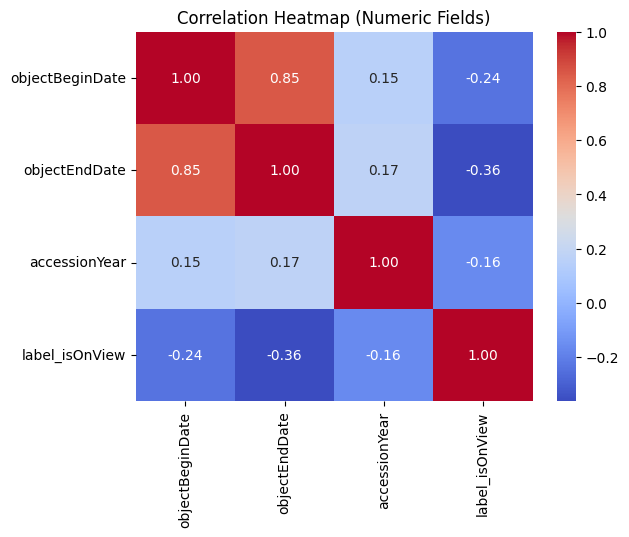

In [20]:
corr = df_train[numeric_cols + ["label_isOnView"]].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Fields)")
plt.show()

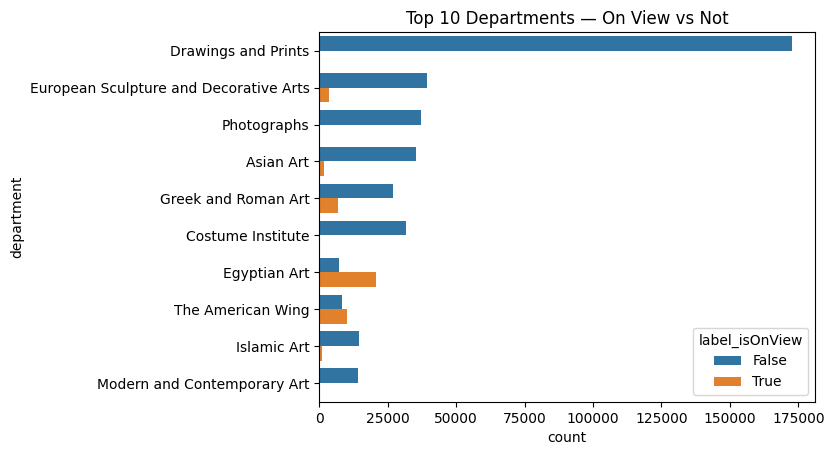

In [21]:
sns.countplot(y="department", hue="label_isOnView",
              data=df_train, order=df_train["department"].value_counts().head(10).index)
plt.title("Top 10 Departments — On View vs Not")
plt.show()


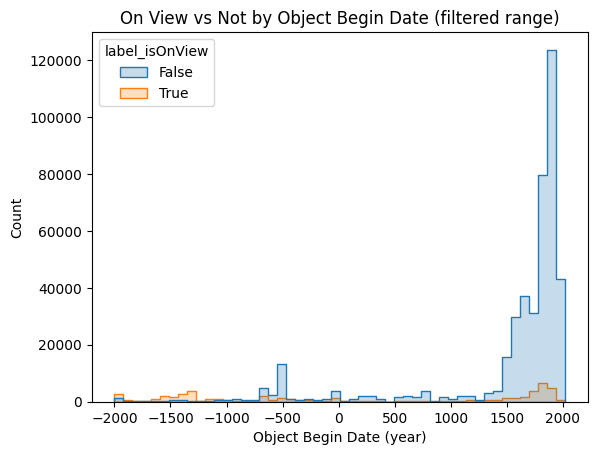

In [22]:
# Filter to a reasonable range (drop NaNs and extreme outliers)
mask = df_train["objectBeginDate"].between(-2000, 2025) & df_train["objectBeginDate"].notna()

sns.histplot(
    data=df_train[mask],
    x="objectBeginDate",
    hue="label_isOnView",
    bins=50,
    element="step",
    common_norm=False
)
plt.title("On View vs Not by Object Begin Date (filtered range)")
plt.xlabel("Object Begin Date (year)")
plt.ylabel("Count")
plt.show()

In [23]:
# Columns to drop because they are too sparse
sparse_cols = [
    "reign",
    "dynasty",
    "subregion",
    "region",
    "period",
    "country"   # optional: drop because ~84% sparse
]

# Drop only if they exist (safe)
df_train = df_train.drop(columns=[c for c in sparse_cols if c in df_train.columns])
print(df_train.columns)

Index(['accessionYear', 'objectID', 'medium', 'title', 'objectName',
       'objectEndDate', 'objectBeginDate', 'department', 'isPublicDomain',
       'classification', 'creditLine', 'culture', 'isTimelineWork',
       'objectDate', 'label_isOnView'],
      dtype='object')


In [24]:
TEXT_COLS = [
    "title", "objectName", "medium", "creditLine",
    "classification", "department", "culture", "objectDate"
]

# df_train["text_all"] = df_train[TEXT_COLS].agg(" ".join, axis=1)
for col in TEXT_COLS:
    df_train[col] = df_train[col].fillna("").astype(str)

df_train["text_all"] = df_train[TEXT_COLS].agg(" ".join, axis=1)

for col in TEXT_COLS:
    bad = df_train[col].apply(lambda x: not isinstance(x, str)).sum()
    print(f"{col}: {bad} non-string values")

df_train.loc[~df_train["objectDate"].apply(lambda x: isinstance(x, str)), "objectDate"].head()



title: 0 non-string values
objectName: 0 non-string values
medium: 0 non-string values
creditLine: 0 non-string values
classification: 0 non-string values
department: 0 non-string values
culture: 0 non-string values
objectDate: 0 non-string values


Series([], Name: objectDate, dtype: object)

In [25]:
# df_train.to_parquet("../data/df_train_clean.parquet", index=False)

In [26]:
df_train.head()

,accessionYear,objectID,medium,title,objectName,objectEndDate,objectBeginDate,department,isPublicDomain,classification,creditLine,culture,isTimelineWork,objectDate,label_isOnView,text_all
0,1881.0,24991,"Steel, wood, silver, niello",Dagger (Kindjal) with Sheath,Dagger (Kindjal) with sheath,1875,1815,Arms and Armor,True,Daggers,"Bequest of Stephen Whitney Phoenix, 1881","Caucasian, possibly northern Dagestan",True,ca. 1840–50,True,Dagger (Kindjal) with Sheath Dagger (Kindjal) ...
1,1975.0,459006,"Tempera on wood, gold ground",Six Angels,Painting,1370,1360,Robert Lehman Collection,True,Paintings,"Robert Lehman Collection, 1975",,False,ca. 1365,True,"Six Angels Painting Tempera on wood, gold grou..."
2,1975.0,460813,"Figures of lampworked glass (opaque white, pal...",The Finding of Moses,Figurine,1900,1700,Robert Lehman Collection,True,Glass,"Robert Lehman Collection, 1975",probably French (Nevers),False,"18th century, reassembled last half 19th century",True,The Finding of Moses Figurine Figures of lampw...
3,1975.0,461279,"Colorless nonlead glass. Cut, polished, revers...",A Female Saint (possibly Rosalia),Panel,1800,1750,Robert Lehman Collection,True,Glass,"Robert Lehman Collection, 1975",probably Bohemia or Lower Austria,False,second half 18th century,True,A Female Saint (possibly Rosalia) Panel Colorl...
4,1975.0,461472,"Rock crystal. Cut, polished, reverse painted, ...",The Deposition,Plaque,1600,1575,Robert Lehman Collection,True,Glass,"Robert Lehman Collection, 1975",Italian,False,late 16th century,True,"The Deposition Plaque Rock crystal. Cut, polis..."


In [27]:
cols = ["isTimelineWork", "isPublicDomain", "label_isOnView"]
df_corr = df_train[cols].astype(int)

corr = df_corr.corr()
print(corr)



                isTimelineWork  isPublicDomain  label_isOnView
isTimelineWork        1.000000        0.078253        0.144530
isPublicDomain        0.078253        1.000000        0.117272
label_isOnView        0.144530        0.117272        1.000000


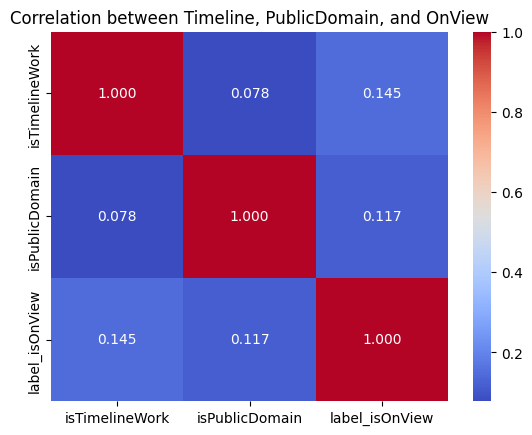

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation between Timeline, PublicDomain, and OnView")
plt.show()


In [30]:
pd.crosstab(df_train["isTimelineWork"], df_train["label_isOnView"], normalize="index")
#Being a timeline work increases the chances of being on view dramatically

label_isOnView,False,True
isTimelineWork,,
False,0.897718,0.102282
True,0.544805,0.455195
